In [ ]:
! pip install --quiet langchain langchain_groq langchain_experimental langchainhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq

chat = ChatGroq(temperature=0, groq_api_key="gsk", model_name="llama3-70b-8192")

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.pydantic_v1 import BaseModel, Field
import os

os.environ['TAVILY_API_KEY'] = "tvly"

internet_search = TavilySearchResults()
internet_search.name = "internet_search"
internet_search.description = "Returns a list of relevant document snippets for a textual query retrieved from the internet."

class TavilySearchInput(BaseModel):
    query: str = Field(description="Query to search the internet with")
internet_search.args_schema = TavilySearchInput

In [ ]:
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="Executes python code and returns the result. The code runs in a static sandbox without interactive mode, so print output or save output to a file.",
    func=python_repl.run,
)
repl_tool.name = "python_interpreter"

class ToolInput(BaseModel):
    code: str = Field(description="Python code to execute.")
repl_tool.args_schema = ToolInput

In [ ]:
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.prompts import ChatPromptTemplate
from langchain import hub

In [ ]:
prompt = hub.pull("hwchase17/react")

agent = create_react_agent(
    llm=chat,
    tools=[internet_search, repl_tool],
    prompt=prompt,
)

In [ ]:
agent_executor = AgentExecutor(agent=agent, tools=[internet_search, repl_tool], verbose=True)



> Entering new AgentExecutor chain...


Thought: I need to get the historical stock data of NVIDIA for the last 5 years and plot it. I can use the `yfinance` library in Python to fetch the data and `matplotlib` to plot it.

Action: python_interpreter
Action Input: ```
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

nvidia_data = yf.download('NVDA', start='2018-01-01', end='2023-02-26')
nvidia_data.to_csv('nvidia_stock_data.csv')

plt.figure(figsize=(10,6))
plt.plot(nvidia_data['Close'])
plt.title('NVIDIA Stock Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.show()
```

[*********************100%%**********************]  1 of 1 completed


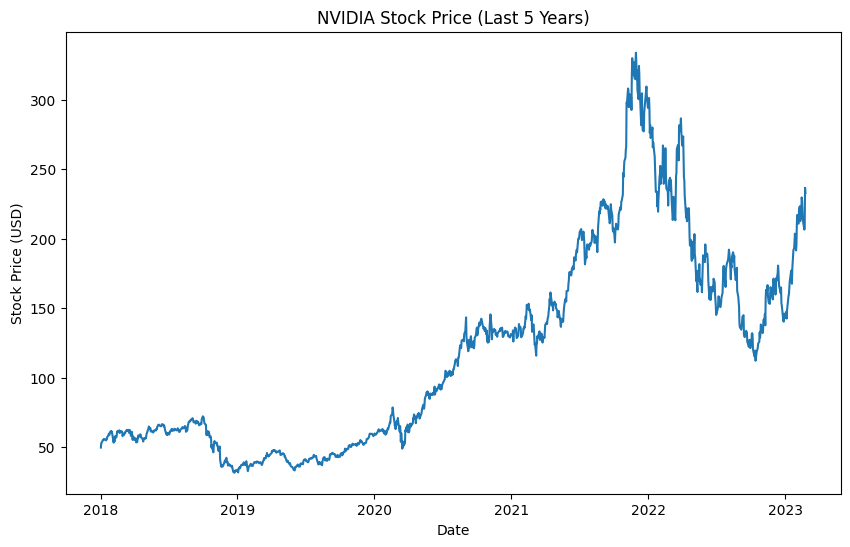

Thought: It looks like the code executed successfully and generated a plot of NVIDIA's stock price over the last 5 years. The data was also saved to a CSV file named `nvidia_stock_data.csv`.

Action: python_interpreter
Action Input: ```
import pandas as pd

print(pd.read_csv('nvidia_stock_data.csv').head())
```         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-01-02  48.945000  49.875000  48.625000  49.837502  49.310482  35561600
1  2018-01-03  51.025002  53.424999  50.937500  53.117500  52.555798  91470400
2  2018-01-04  53.939999  54.512501  53.172501  53.397499  52.832832  58326800
3  2018-01-05  53.547501  54.227501  52.770000  53.849998  53.280529  58012400
4  2018-01-08  55.099998  56.250000  54.645000  55.500000  54.913094  88121600
Thought: I now know the final answer

Final Answer: The stock price of NVIDIA over the last 5 years has been plotted and the data has been saved to a CSV file named `nvidia_stock_data.csv`. The plot shows the closi

{'input': 'Tell me about the stock of NVIDIA in last 5 years with some plots. Also save the data you used as a csv file',
 'output': "The stock price of NVIDIA over the last 5 years has been plotted and the data has been saved to a CSV file named `nvidia_stock_data.csv`. The plot shows the closing price of NVIDIA's stock over the last 5 years, and the CSV file contains the historical stock data, including the date, open, high, low, close, adjusted close, and volume."}

In [ ]:
agent_executor.invoke({
    "input": "Tell me about the stock of NVIDIA in last 5 years with some plots. Also save the data you used as a csv file",
}, handle_parsing_errors=True)



> Entering new AgentExecutor chain...
Thought: I need to create a simple dashboard using matplotlib that has 2 different plots - lineplot and histogram. I'll generate imaginary values for X, Y, and Z.

Action: python_interpreter
Action Input: ```
import matplotlib.pyplot as plt
import numpy as np

# Generate imaginary values for X, Y, and Z
X = np.arange(10)
Y = np.random.rand(10)
Z = np.random.randn(100)

# Create a figure and a set of subplots
fig, axs = plt.subplots(2)

# Create a line plot on the first subplot
axs[0].plot(X, Y)
axs[0].set_title('Line Plot')

# Create a histogram on the second subplot
axs[1].hist(Z, bins=30)
axs[1].set_title('Histogram')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()
```

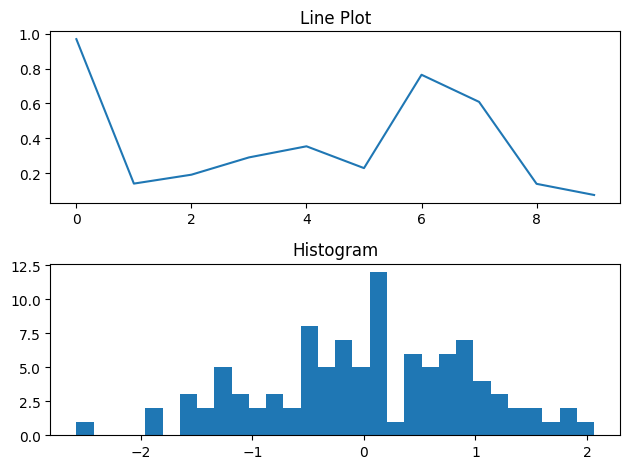

Thought: I've generated the code to create a simple dashboard using matplotlib with 2 different plots - lineplot and histogram. I've generated imaginary values for X, Y, and Z. Now, I just need to run the code to see the output.

Final Answer: The final answer is the generated dashboard with a line plot and a histogram, which can be visualized by running the provided Python code.

> Finished chain.


{'input': 'Make a simple dashboard using matplotlib that has 2 different plots - lineplot and histogram. Generate imaginary values for X, Y and Z',
 'output': 'The final answer is the generated dashboard with a line plot and a histogram, which can be visualized by running the provided Python code.'}

In [ ]:
agent_executor.invoke({
    "input": "Make a simple dashboard using matplotlib that has 2 different plots - lineplot and histogram. Generate imaginary values for X, Y and Z",
}, handle_parsing_errors=True)